# PhantomMail
This library is meant for generating fake emails for a specific topic. We will use the Python library faker to generate fake email addresses and company names and then we will use Ollama with Phi4 to generate the actual email contents.

Once the email is complete we will use Resend to send the email to a specific email address 

In this case, we will be generating fake order emails to request transports. 

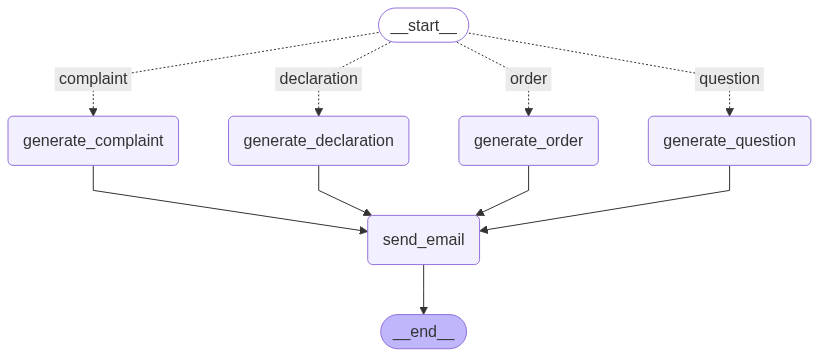

I0000 00:00:1754130878.781238 16025655 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


Iteration 1:
{'recipients': ['vectrans-demo@vectrixbe.onmicrosoft.com'], 'email': '\n        <div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6; color: #333;">\n    <div style="margin-bottom: 20px;">\n        <p>Hi Tom,</p>\n        \n        <p>Thanks for your email about the Warsaw delivery.</p>\n        \n        <p>As requested, I\'m attaching the export docs for MRN GB4511075535438544. Everything is cleared and ready for pickup at our Rotterdam warehouse.</p>\n        \n        <p>The driver will need these documents at the border.</p>\n        \n        <p>Let me know if you need anything else.</p>\n        \n        <p style="margin-top: 30px;">\n            Best,<br>\n            Johan\n        </p>\n    </div>\n    \n    <div style="margin-top: 30px; padding: 10px; background-color: #f5f5f5; border-left: 3px solid #ccc;">\n        <p style="margin: 0 0 10px 0; font-size: 12px; color: #666;">\n            <strong>From:</strong> Tom Janssens &lt;t.jans

I0000 00:00:1754130941.228617 16025655 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


Iteration 2:
{'recipients': ['vectrans-demo@vectrixbe.onmicrosoft.com'], 'email': '<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6; color: #333;">\n    <div style="margin-bottom: 20px;">\n        <p>Good afternoon</p>\n        \n        <p>Copy clearance confirmation attached</p>\n        \n        <p>Best Regards<br>\n        Michael</p>\n    </div>\n    \n    <div style="margin-top: 30px; padding: 10px; background-color: #f5f5f5; border-left: 3px solid #ccc;">\n        <p style="margin: 0 0 10px 0; font-size: 12px; color: #666;">\n            <strong>From:</strong> Nordvik Paper AB &lt;logistics@nordvikpaper.se&gt;<br>\n            <strong>Sent:</strong> 02 August 2025 14:35<br>\n            <strong>To:</strong> Vectrans NV &lt;customs@vectrans.be&gt;; Richter Chemie GmbH &lt;logistics@richterchemie.de&gt;<br>\n            <strong>Subject:</strong> documents for cu5290\n        </p>\n        \n        <div style="font-size: 13px;">\n            <p>Dear A

I0000 00:00:1754130990.066437 16025655 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


Iteration 3:
{'recipients': ['vectrans-demo@vectrixbe.onmicrosoft.com'], 'email': '<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6; color: #333;">\n    <div style="margin-bottom: 20px;">\n        <p>Good afternoon</p>\n        \n        <p>Copy clearance confirmation attached</p>\n        \n        <p>Best Regards<br>\n        Michael</p>\n    </div>\n    \n    <div style="margin-top: 30px; padding: 10px; background-color: #f5f5f5; border-left: 3px solid #ccc;">\n        <p style="margin: 0 0 10px 0; font-size: 12px; color: #666;">\n            <strong>From:</strong> Grupo Castellano S.L. &lt;shipping@grupocastellano.es&gt;<br>\n            <strong>Sent:</strong> 02 August 2025 12:40<br>\n            <strong>To:</strong> Vectrans NV &lt;logistics@vectrans.be&gt;; Van Der Meer Logistics B.V. &lt;imports@vandermeerlogistics.nl&gt;<br>\n            <strong>Subject:</strong> Important Shipping Documents\n        </p>\n        \n        <div style="font-size: 1

In [ ]:
import nest_asyncio
nest_asyncio.apply()

from IPython.display import Markdown, display, Image
from dotenv import load_dotenv
from phantommail.graphs import graph
import os



load_dotenv()


display(Image(graph.get_graph().draw_mermaid_png()))

config = {"configurable": {"sender": os.environ["SENDER_EMAIL"]}}


for i in range(1):
    response = await graph.ainvoke({'recipients': ['vectrans-demo@vectrixbe.onmicrosoft.com'], 'email_type': 'declaration'}, config=config)
    print(f"Iteration {i+1}:")
    print(response)
    print("-" * 50)

In [ ]:
import pandas as pd

customers = pd.read_csv('../src/phantommail/assets/customers.csv')
customers

In [ ]:
from langgraph_sdk import get_client

client = get_client(url=os.environ['LANGGRAPH_URL'])
# Using the graph deployed with the name "agent"
assistant_id = "graph"
# create thread
thread = await client.threads.create()
print(thread)

In [ ]:
config = {"configurable": {"sender": os.environ["SENDER_EMAIL"]}}

# This schedules a job to run at 15:27 (3:27PM) every day
cron_job_stateless = await client.crons.create(
    "graph",
    schedule="* * * * *",
    input={'recipients': ['vectrix-test@outlook.com']}, 
    config=config,
)

cron_job_stateless

In [ ]:
await client.crons.delete(cron_job_stateless["cron_id"])